# Лабораторная работа №2

ФИО:   
Группа:

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №6 в семестре (Занятие №2 очное)

Что необходимо сделать:  
**В общих чертах просто провести EDA** (но обычно это не бывает просто)
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/1k2MYXEp_OVQrink_XRC1PwoM0ZuNMeNz4VTWY7cI3hE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. **Найти** в таблице (из исходных данных) название своего датасета
2. **Описать** кратко постановку задачи, что от вас хотят. Какие есть переменные. Целевое событие непрерывно (предсказываем число от -$\infty$ до $\infty$) либо дискретно (предсказываем класс из конечного множества вариантов, например 0 или 1, или какое-то число в диапазоне [0; 10])
3. Построить распределение целевой переменной в виде гистограммы, сделать промежуточные выводы (обратите внимание на однородоность распределения и возможный дисбаланс). Посчитайте количество уникальных значений целевой переменной.
4. Выведите основные статистики по переменным в датасете (для этого есть готовый метод в pandas, он считает count, min, max, mean, 25%, 50% и пр.). Это делается **одним** методом (вы его знаете).
5. Выведите основную информацию по датасету (сколько всего колонок, каких они типов, сколько в них non-null элементов). Это делается **одним** методом (вы его знаете).
6. Посчитайте количество пропусков (NaN, Null, null, None) элементов во всех колонках. Предположите, почему эти пропуски могли возникнуть, и как их можно было бы заменить.
7. Постройте гистограммы 5 любых признаков (из множества `X`, или как оно изначально у нас называется `data.data`). Если видите какое-то смещение, несимметричность и прочее, опишите это словами в ноутбуке.
8. Постройте графики зависимости 5 любых (на ваш выбор) переменных от целевой переменной (если переменных меньше, чем 5, то сделайте столько, сколько получится). Сделайте вывод, можно ли использовать эти переменные для прогнозирования целевой переменной (иначе говоря, есть ли какая-то взаимосвязь между y-переменной и X-переменной)  
9. _extra_ (необязательно). Посмотрите на зависимость двух переменных одновременно от целевой переменной. То есть по оси OX должна быть переменная $X_{n}$, по оси OY -- переменная $X_{k}$. И у вас будет две кривые (два облака точек) в разрезе целевой переменной. Либо вы можете построить похожее для категориальных признаков, но необходимо будет прочитать про heatmap.

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

# 1. Пример импорта данных

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("exams.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


#2. Постановка задачи и целевая переменная
Задача состоит в предсказании результатов тестирования math score на основе характеристик студента (пол, группа, уровень образования родителей и т.д.).

Целевая переменная: math score.

Тип целевой переменной: дискретная (предсказываем балл, который может варьироваться от 0 до 100).

Признаки: gender, race/ethnicity, parental level of education, lunch, test preparation course, reading score, writing score.



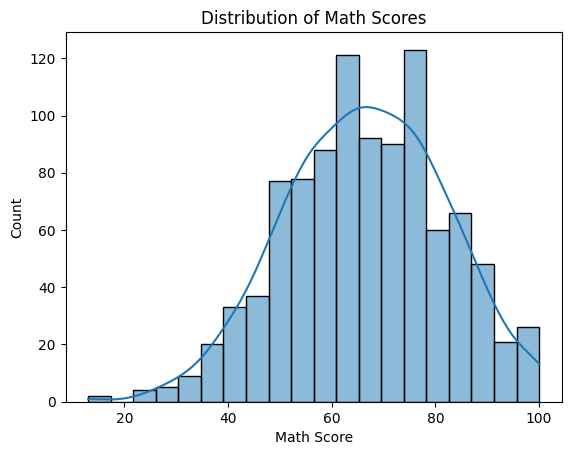

Количество уникальных значений math score: 77


In [37]:
sns.histplot(data['math score'], bins=20, kde=True)
plt.xlabel('Math Score')
plt.title('Distribution of Math Scores')
plt.show()

unique_values = data['math score'].nunique()
print("Количество уникальных значений math score:", unique_values)

## 3. Распределение целевой переменной

In [38]:
data.describe()

,math score,reading score,writing score,avg_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000,67.712000
std,15.402871,14.737272,15.600985,14.514244
min,13.000000,27.000000,23.000000,21.666667
25%,56.000000,60.000000,58.000000,58.583333
50%,66.500000,70.000000,68.000000,67.333333
75%,77.000000,79.000000,79.000000,78.333333
max,100.000000,100.000000,100.000000,100.000000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   avg_score                    1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


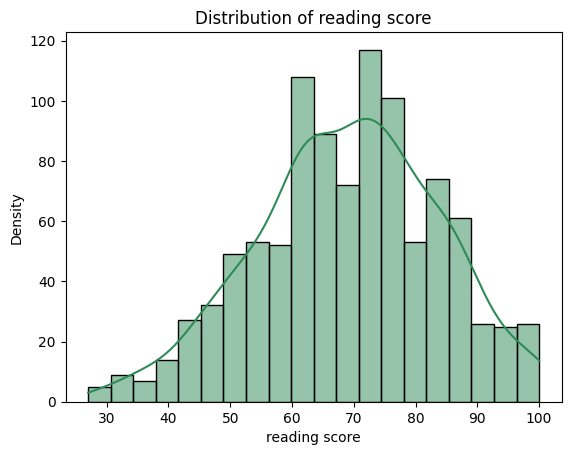

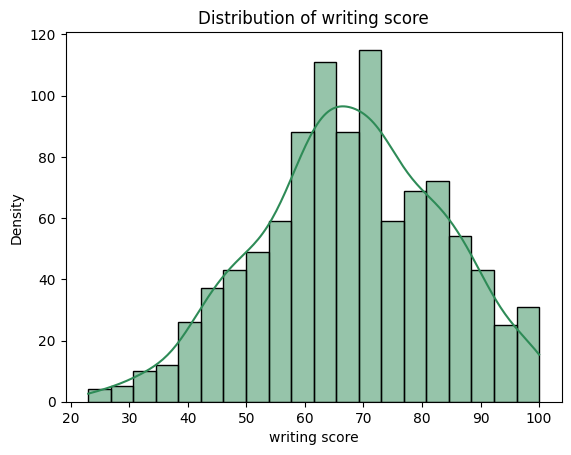

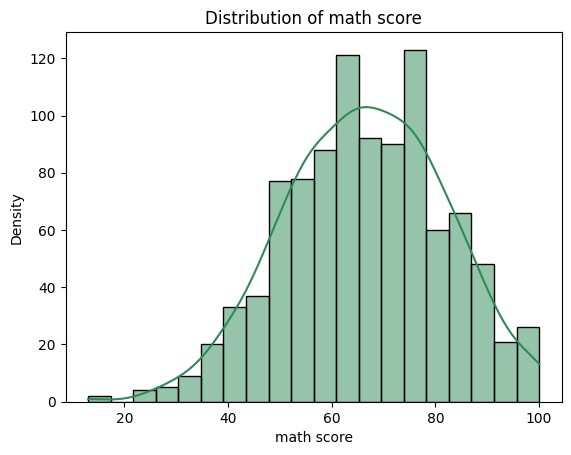

<ipython-input-46-9e679fc8d2fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')  # Используем палитру 'Set2' для мягких цветов


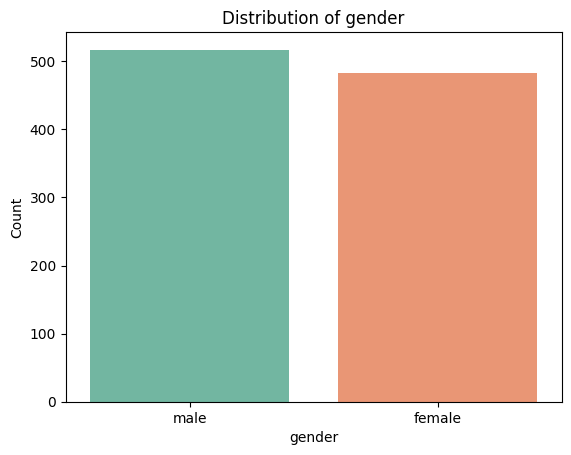

<ipython-input-46-9e679fc8d2fc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='Set2')  # Используем палитру 'Set2' для мягких цветов


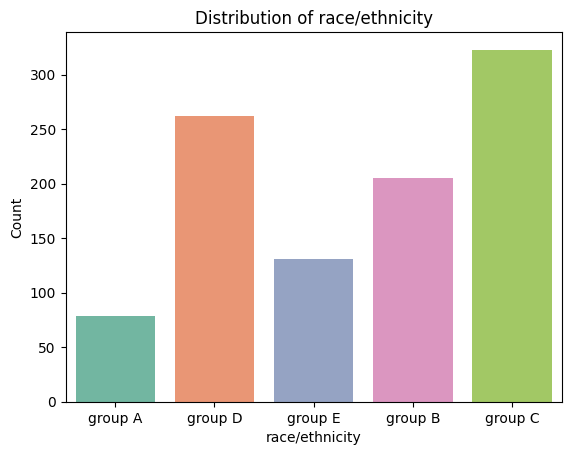

In [46]:
# Выбор признаков для визуализации
features = ['reading score', 'writing score', 'math score', 'gender', 'race/ethnicity']

# Построение гистограмм
for feature in features:
    plt.figure()
    if data[feature].dtype == 'object':
        sns.countplot(x=feature, data=data, palette='Set2')
    else:
        sns.histplot(data[feature], bins=20, kde=True, color='seagreen')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count' if data[feature].dtype == 'object' else 'Density')
    plt.show()


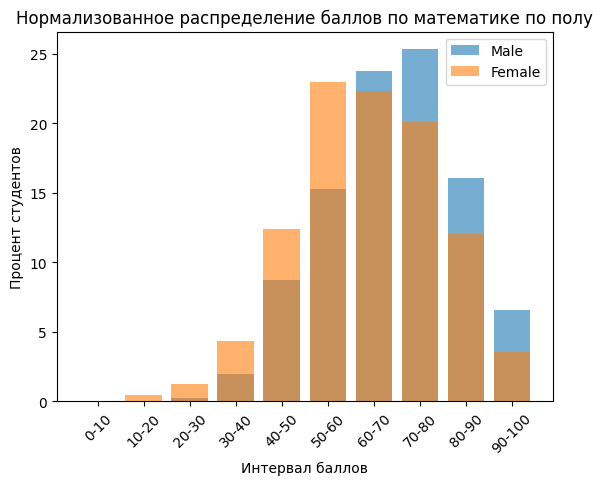

In [28]:
# Разделим баллы по математике на интервалы с шагом 10
bins = range(0, 101, 10)
intervals = [f'{i}-{i + 10}' for i in bins[:-1]]

# Подсчитаем нормализованное количество студентов по каждому интервалу для мужчин и женщин
male_counts = {interval: len(data[(data['math score'] >= bins[i]) & (data['math score'] < bins[i + 1]) & (data['gender'] == 'male')])
               / len(data[(data['gender'] == 'male')]) * 100
               for i, interval in enumerate(intervals)}

female_counts = {interval: len(data[(data['math score'] >= bins[i]) & (data['math score'] < bins[i + 1]) & (data['gender'] == 'female')])
                 / len(data[(data['gender'] == 'female')]) * 100
                 for i, interval in enumerate(intervals)}

plt.bar(male_counts.keys(), male_counts.values(), label='Male', alpha=0.6)
plt.bar(female_counts.keys(), female_counts.values(), label='Female', alpha=0.6)
plt.title('Нормализованное распределение баллов по математике по полу')
plt.xlabel('Интервал баллов')
plt.ylabel('Процент студентов')
plt.legend()
plt.xticks(rotation=45)
plt.show()


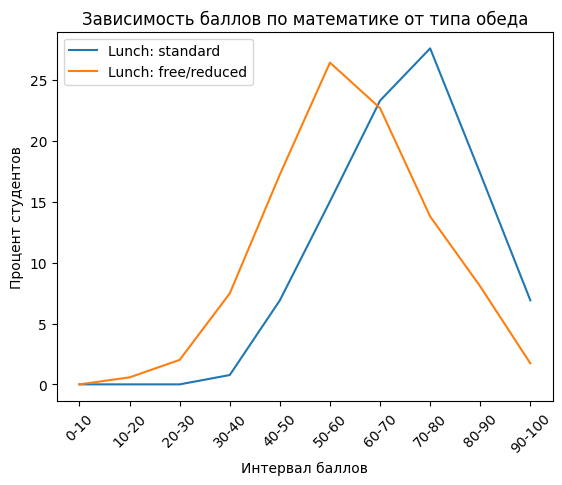

In [32]:
# Зависимость баллов по математике от типа обеда
lunch_types = data['lunch'].unique()

lunch_counts = {}
for lunch in lunch_types:
    counts = {interval: len(data[(data['math score'] >= bins[i]) &
                                 (data['math score'] < bins[i + 1]) &
                                 (data['lunch'] == lunch)])
              for i, interval in enumerate(intervals)}

    # Нормализуем в процентах
    total_count = len(data[data['lunch'] == lunch])
    normalized_counts = {k: v / total_count * 100 for k, v in counts.items()}

    lunch_counts[lunch] = normalized_counts

# Построим графики для каждого типа обеда
for lunch, counts in lunch_counts.items():
    plt.plot(counts.keys(), counts.values(), label=f'Lunch: {lunch}')

plt.title('Зависимость баллов по математике от типа обеда')
plt.xlabel('Интервал баллов')
plt.ylabel('Процент студентов')
plt.legend()
plt.xticks(rotation=45)
plt.show()


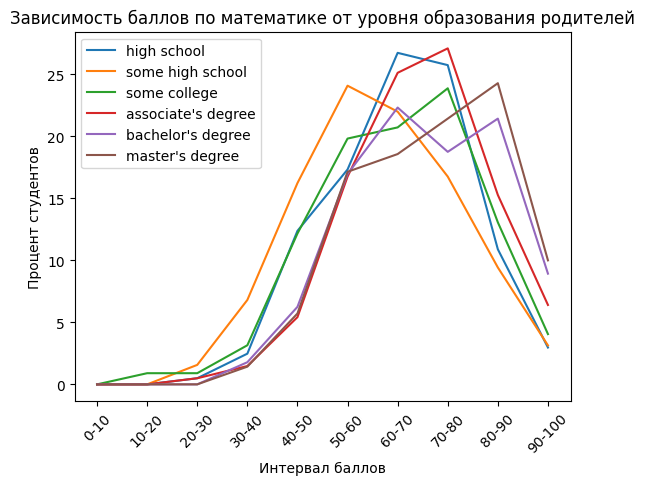

In [30]:
# Зависимость баллов по математике от уровня образования родителей
education_levels = data['parental level of education'].unique()

bins = range(0, 101, 10)
intervals = [f'{i}-{i + 10}' for i in bins[:-1]]

# Нормализуем количество студентов для каждого уровня образования
education_counts = {}
for level in education_levels:
    counts = {interval: len(data[(data['math score'] >= bins[i]) &
                                 (data['math score'] < bins[i + 1]) &
                                 (data['parental level of education'] == level)])
              for i, interval in enumerate(intervals)}

    # Нормализуем в процентах от общего числа студентов с данным уровнем образования
    total_count = len(data[data['parental level of education'] == level])
    normalized_counts = {k: v / total_count * 100 for k, v in counts.items()}

    education_counts[level] = normalized_counts

for level, counts in education_counts.items():
    plt.plot(counts.keys(), counts.values(), label=f'{level}')

plt.title('Зависимость баллов по математике от уровня образования родителей')
plt.xlabel('Интервал баллов')
plt.ylabel('Процент студентов')
plt.legend()
plt.xticks(rotation=45)
plt.show()


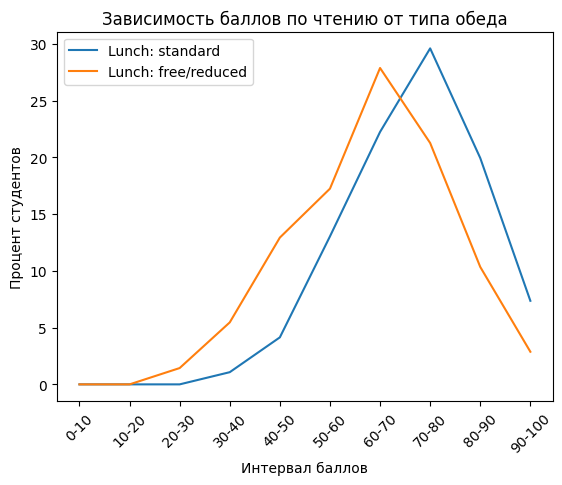

In [33]:
# Зависимость баллов по чтению от типа обеда
lunch_reading_counts = {}
for lunch in lunch_types:
    counts = {interval: len(data[(data['reading score'] >= bins[i]) &
                                 (data['reading score'] < bins[i + 1]) &
                                 (data['lunch'] == lunch)])
              for i, interval in enumerate(intervals)}

    # Нормализуем в процентах
    total_count = len(data[data['lunch'] == lunch])
    normalized_counts = {k: v / total_count * 100 for k, v in counts.items()}

    lunch_reading_counts[lunch] = normalized_counts

# Построим графики для каждого типа обеда
for lunch, counts in lunch_reading_counts.items():
    plt.plot(counts.keys(), counts.values(), label=f'Lunch: {lunch}')

plt.title('Зависимость баллов по чтению от типа обеда')
plt.xlabel('Интервал баллов')
plt.ylabel('Процент студентов')
plt.legend()
plt.xticks(rotation=45)
plt.show()


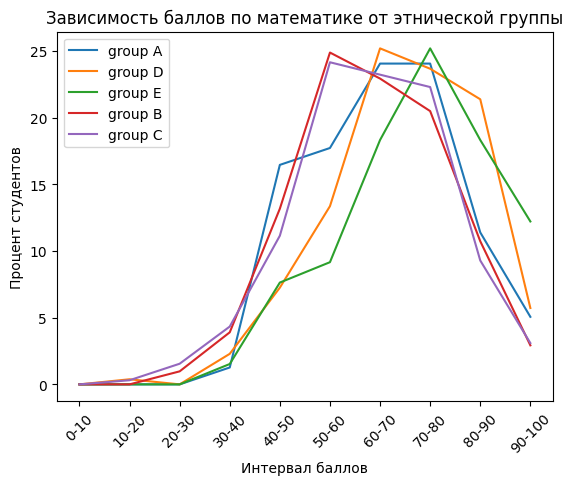

In [35]:
# Зависимость баллов по математике от этнической группы
ethnicity_counts = {}
for ethnicity in data['race/ethnicity'].unique():
    counts = {interval: len(data[(data['math score'] >= bins[i]) &
                                 (data['math score'] < bins[i + 1]) &
                                 (data['race/ethnicity'] == ethnicity)])
              for i, interval in enumerate(intervals)}

    # Нормализуем в процентах
    total_count = len(data[data['race/ethnicity'] == ethnicity])
    normalized_counts = {k: v / total_count * 100 for k, v in counts.items()}

    ethnicity_counts[ethnicity] = normalized_counts

# Построим графики для каждой этнической группы
for ethnicity, counts in ethnicity_counts.items():
    plt.plot(counts.keys(), counts.values(), label=f'{ethnicity}')

plt.title('Зависимость баллов по математике от этнической группы')
plt.xlabel('Интервал баллов')
plt.ylabel('Процент студентов')
plt.legend()
plt.xticks(rotation=45)
plt.show()


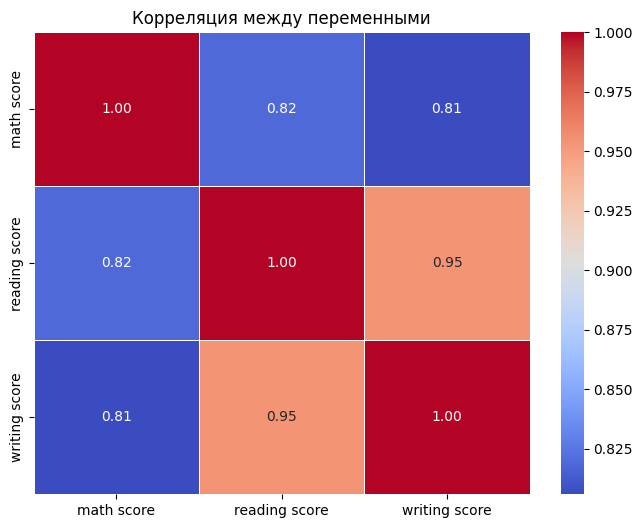

In [44]:
# Выбираем только числовые переменные для анализа
numeric_columns = ['math score', 'reading score', 'writing score']

# Рассчитываем корреляцию между числовыми переменными
correlation_matrix = data[numeric_columns].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Корреляция между переменными')
plt.show()